Best Hyperparameters: {'C': 2, 'gamma': 0.1}
Test Accuracy: 0.765625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.91      0.91      0.91        11
           5       0.74      0.76      0.75       136
           6       0.74      0.72      0.73       128
           7       0.93      1.00      0.96        40
           8       0.00      0.00      0.00         3

    accuracy                           0.77       320
   macro avg       0.55      0.56      0.56       320
weighted avg       0.75      0.77      0.76       320



/Applications/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Applications/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Applications/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

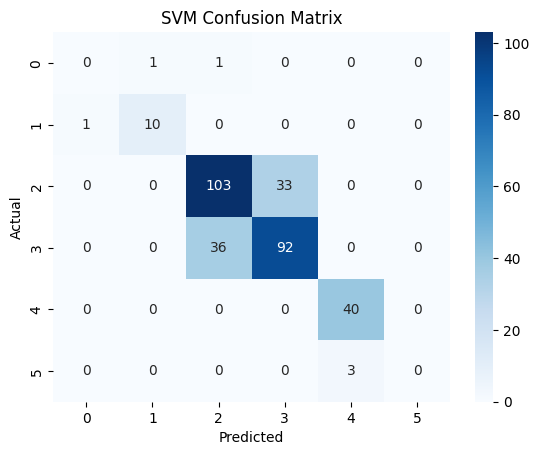

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  - Preprocess data - 

raw = pd.read_csv("winequality-red.csv", header=None, engine="python")
header_row = raw.iloc[0, 0]
columns = header_row.replace('"', '').split(";")

data_rows = raw.iloc[1:, 0]
data = data_rows.apply(lambda x: x.split(";"))
data = pd.DataFrame(data.tolist(), columns=columns)
data = data.apply(pd.to_numeric)

# Merging points
data["quality_grouped"] = data["quality"].apply(
    lambda x: 0 if x <= 4 else (1 if x <= 6 else 2)
)

X = data.drop("quality", axis=1)
y = data["quality"]

# - Splitting dataset -

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# - Feature scaling - 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# - SVM + Grid Search -

param_grid = {
    "C": [1, 2, 3, 5, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}

svm = SVC(kernel="rbf")
grid = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_svm = grid.best_estimator_

# - Evaluation -
y_pred = best_svm.predict(X_test_scaled)

print("Best Hyperparameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()